In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
%matplotlib inline

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

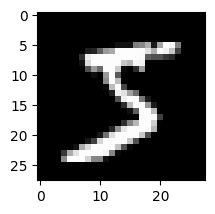

In [7]:
plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))

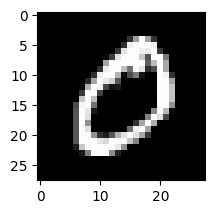

In [8]:
plt.subplot(222)
plt.imshow(x_train[1], cmap = plt.get_cmap('gray'))

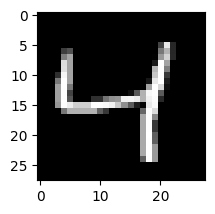

In [11]:
plt.subplot(223)
plt.imshow(x_train[2], cmap = plt.get_cmap('gray'))

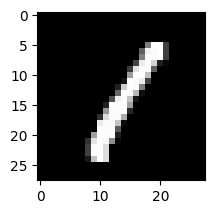

In [12]:
plt.subplot(224)
plt.imshow(x_train[3], cmap = plt.get_cmap('gray'))

In [13]:
plt.show()

In [14]:
img_rows, img_cols = 28, 28
num_pixels = (img_rows * img_cols)

x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype(float)
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype(float)

In [15]:
x_train /= 255
x_test /= 255
num_classes = 10

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_test.shape

(10000, 784)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_test.shape

(10000, 10)

In [20]:
def neural_model():
    nn = Sequential()
    nn.add(Dense(num_pixels, activation = 'relu', kernel_initializer = 'normal', input_dim = num_pixels))
    nn.add(Dense(128, activation = 'relu', kernel_initializer = 'normal'))
    nn.add(Dense(num_classes, activation = 'softmax', kernel_initializer = 'normal'))
    nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return nn

In [21]:
batch_size = 128
epochs = 10
model = neural_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size, verbose = 2)
scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', round(scores[0] * 100, 2))
print('Test Accuracy: ', round(scores[1] * 100, 2))
model.save("neural_result.h5")

Epoch 1/10
469/469 - 4s - 10ms/step - accuracy: 0.9270 - loss: 0.2541 - val_accuracy: 0.9642 - val_loss: 0.1123
Epoch 2/10
469/469 - 3s - 7ms/step - accuracy: 0.9730 - loss: 0.0901 - val_accuracy: 0.9747 - val_loss: 0.0764
Epoch 3/10
469/469 - 3s - 7ms/step - accuracy: 0.9831 - loss: 0.0557 - val_accuracy: 0.9754 - val_loss: 0.0757
Epoch 4/10
469/469 - 3s - 7ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9825 - val_loss: 0.0626
Epoch 5/10
469/469 - 5s - 11ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9798 - val_loss: 0.0673
Epoch 6/10
469/469 - 4s - 8ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9823 - val_loss: 0.0665
Epoch 7/10
469/469 - 4s - 8ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9812 - val_loss: 0.0628
Epoch 8/10
469/469 - 4s - 8ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9789 - val_loss: 0.0824
Epoch 9/10
469/469 - 5s - 11ms/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 0.9801 - val_loss: 0.078

Test Loss:  7.7
Test Accuracy:  98.03


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = 10

In [24]:
def conv_model():
    cnn = Sequential()
    cnn.add(Conv2D(20, (5, 5), input_shape = (img_rows, img_cols, 1), activation = 'relu'))
    cnn.add(MaxPooling2D())
    cnn.add(Conv2D(15, (3, 3), activation = 'relu'))
    cnn.add(MaxPooling2D())
    cnn.add(Dropout(0.2))
    cnn.add(BatchNormalization())
    cnn.add(Flatten())
    cnn.add(Dense(128, activation = 'relu'))
    cnn.add(Dense(64, activation = 'relu'))
    cnn.add(Dense(num_classes, activation = 'softmax'))
    cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return cnn

In [25]:
batch_size = 128
epochs = 10

model = conv_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 20)          │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 15)          │           2,715 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 5, 5, 15)            │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 375)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          48,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,329 (235.66 KB)

 Trainable params: 60,299 (235.54 KB)

 Non-trainable params: 30 (120.00 B)

In [26]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size, verbose = 2)
scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', round(scores[0] * 100, 2))
print('Test Accuracy: ', round(scores[1] * 100, 2))
model.save("conv_result.keras")

Epoch 1/10
469/469 - 7s - 15ms/step - accuracy: 0.9355 - loss: 0.2058 - val_accuracy: 0.9817 - val_loss: 0.0655
Epoch 2/10
469/469 - 5s - 11ms/step - accuracy: 0.9797 - loss: 0.0631 - val_accuracy: 0.9837 - val_loss: 0.0488
Epoch 3/10
469/469 - 5s - 11ms/step - accuracy: 0.9852 - loss: 0.0474 - val_accuracy: 0.9894 - val_loss: 0.0315
Epoch 4/10
469/469 - 5s - 11ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9905 - val_loss: 0.0313
Epoch 5/10
469/469 - 6s - 12ms/step - accuracy: 0.9892 - loss: 0.0345 - val_accuracy: 0.9910 - val_loss: 0.0294
Epoch 6/10
469/469 - 5s - 11ms/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9918 - val_loss: 0.0283
Epoch 7/10
469/469 - 5s - 11ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9905 - val_loss: 0.0297
Epoch 8/10
469/469 - 6s - 12ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9896 - val_loss: 0.0329
Epoch 9/10
469/469 - 5s - 12ms/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9867 - val_loss: